<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Sistemas_Lineares_Invariantes_no_Tempo_e_filtrosauladia31_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

# Exemplo de filtro média móvel


In [ ]:
n = np.arange(0,40,1) # índices amostrais
x = np.random.rand(len(n)) # geração de um sinal aleatório com distribuição uniforme entre 0 e 1

In [ ]:
plt.plot(x,'red')
plt.xlabel("n")
plt.ylabel("valores")

Text(0, 0.5, 'valores')

Resposta ao impulso de um filtro de média móvel com M amostras:

In [ ]:
M = 5
h = (1/M)*np.ones(M)
n_h = np.arange(0,len(h),1)
print(h)

[0.2 0.2 0.2 0.2 0.2]


Filtragem através de convolução:

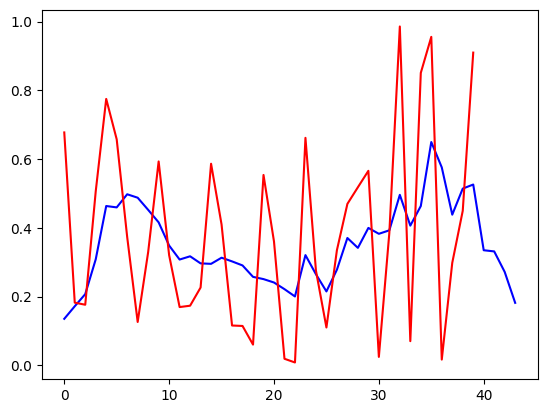

In [ ]:
y = np.convolve(x,h)
n_y = np.linspace(n[0]+n_h[0],n[-1]+n_h[-1],len(n)+len(h)-1) # índices amostrais referentes ao processo de convolução
plt.plot(n_y,y,'blue')
plt.plot(x,'red')

Filtragem através de convolução mostrando apenas os valores do resultado onde ocorre superposição total dos dois sinais envolvidos na convolução:

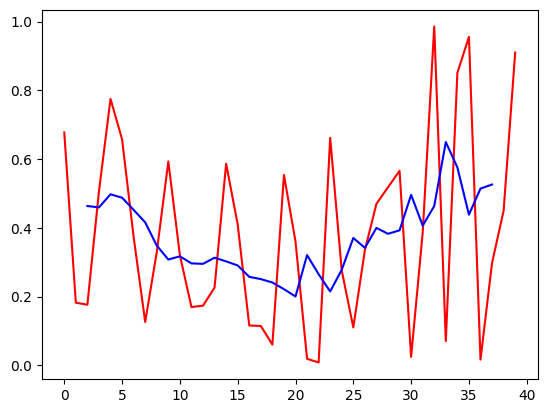

In [ ]:
y = np.convolve(x,h,'valid')
plt.plot(x,'red')
plt.plot(range(np.floor(len(h)/2).astype(int), len(y)+np.floor(len(h)/2).astype(int)), y,'blue')

Filtragem através de convolução mostrando apenas os valores do sinal original e do resultado onde ocorre superposição total dos dois sinais envolvidos na convolução:

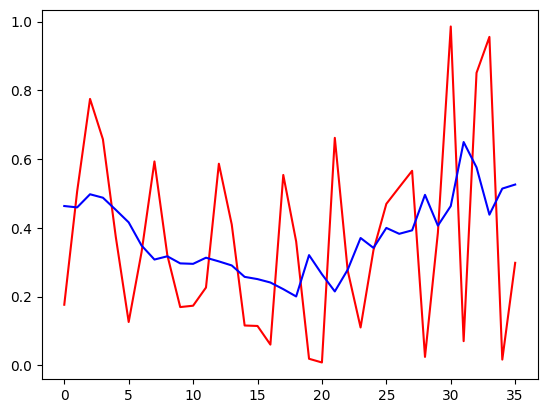

In [ ]:
plt.plot(x[np.floor(len(h)/2).astype(int):len(y)+np.floor(len(h)/2).astype(int)],'red')
plt.plot(y,'blue')

Filtragem através de estrutura na forma direta 2:

In [ ]:
B = h
A = 1
y2 = signal.lfilter(B, A, x)

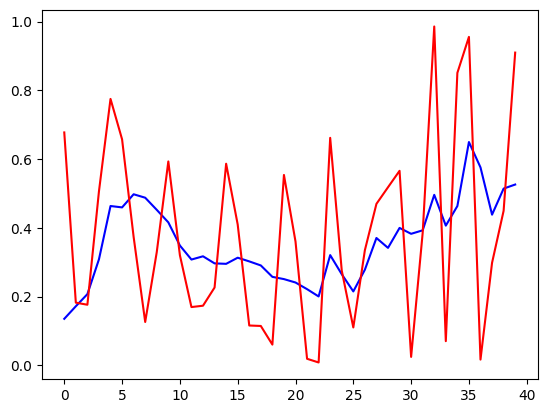

In [ ]:
plt.plot(y2,'blue')
plt.plot(x,'red')

Filtragem através da forma direta mostrando apenas os valores do resultado onde ocorre superposição total dos dois sinais envolvidos na convolução:

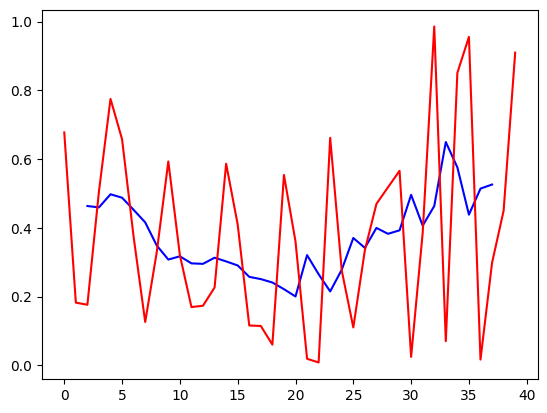

In [ ]:
plt.plot(range(np.floor(len(h)/2).astype(int),len(y2)-np.floor(len(h)/2).astype(int)), y2[M-1:len(y2)],'blue')
plt.plot(x,'red')

#Exemplo com sinal acústico

In [ ]:
# Importando o arquivo de áudio
from google.colab import files
uploaded = files.upload()

Saving WaveDrum02_38#MIX.wav to WaveDrum02_38#MIX.wav


In [ ]:
[fs_audio,audio]=wavfile.read('WaveDrum02_38#MIX.wav')
audio = audio.astype(np.float32)

In [ ]:
plt.plot(audio)

In [ ]:
from IPython.display import Audio
Audio(audio, rate=fs_audio)

NameError: ignored

In [ ]:
B = np.array([0.5, 0, 0.2])
A = np.array([1, 0.4, 0, 0.1])

w, H = signal.freqz(B, A)
f = (fs_audio/2)*(w/np.pi)
plt.plot(f, abs(H)**2)

plt.title('Resposta em frequência do filtro')
plt.xlabel('frequência [Hz]')
plt.ylabel('Espectro de potência')
plt.grid()
plt.show()

In [ ]:
from IPython.display import Audio
audio_filtrado = signal.lfilter(B, A, audio)

NameError: ignored

In [ ]:
plt.plot(audio_filtrado)

Ouvindo:

In [ ]:
Audio(audio_filtrado, rate=fs_audio)

Escalamento para salvar como wav 16bits:

In [ ]:
max_abs_value = max(abs(audio_filtrado))
audio_filtrado = (audio_filtrado/max_abs_value)*2**15

In [ ]:
plt.plot(audio_filtrado)

In [ ]:
wavfile.write("audio_filtrado.wav", fs_audio, audio_filtrado.astype(np.int16))
files.download("audio_filtrado.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Criando um atraso de 0,5s com escalamento de 0,5:

In [ ]:
B = np.zeros(22051)
B[0] = 1
B[-1] = 0.5
A = np.array([1])

audio_eco = signal.lfilter(B, A, audio)

w, H = signal.freqz(B, A)
f = (fs_audio/2)*(w/np.pi)
plt.plot(f, abs(H)**2)

plt.title('Resposta em frequência do filtro')
plt.xlabel('frequência [Hz]')
plt.ylabel('Espectro de potência')
plt.grid()
plt.show()

In [ ]:
Audio(audio_eco, rate=fs_audio)

In [ ]:
# Importando o arquivo de áudio
from google.colab import files
uploaded = files.upload()

In [ ]:
[fs_audio,audio_clarinete]=wavfile.read('cl-mod-bb-sc-leg-asc-32.wav')
audio_clarinete = audio.astype(np.float32)

In [ ]:

Audio(audio_clarinete, rate=fs_audio)

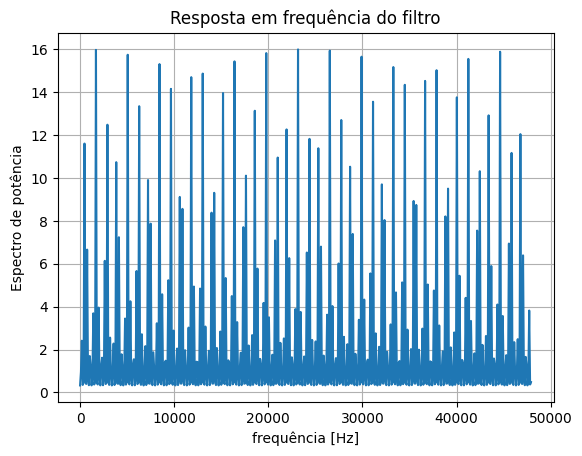

In [ ]:
A = np.zeros(4410)
A[0] = 1
A[-1] = 0.75
B = np.array([1])

audio_eco = signal.lfilter(B, A, audio_clarinete)

w, H = signal.freqz(B, A)
f = (fs_audio/2)*(w/np.pi)
plt.plot(f, abs(H)**2)

plt.title('Resposta em frequência do filtro')
plt.xlabel('frequência [Hz]')
plt.ylabel('Espectro de potência')
plt.grid()
plt.show()

Audio(audio_eco, rate=fs_audio)